In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob

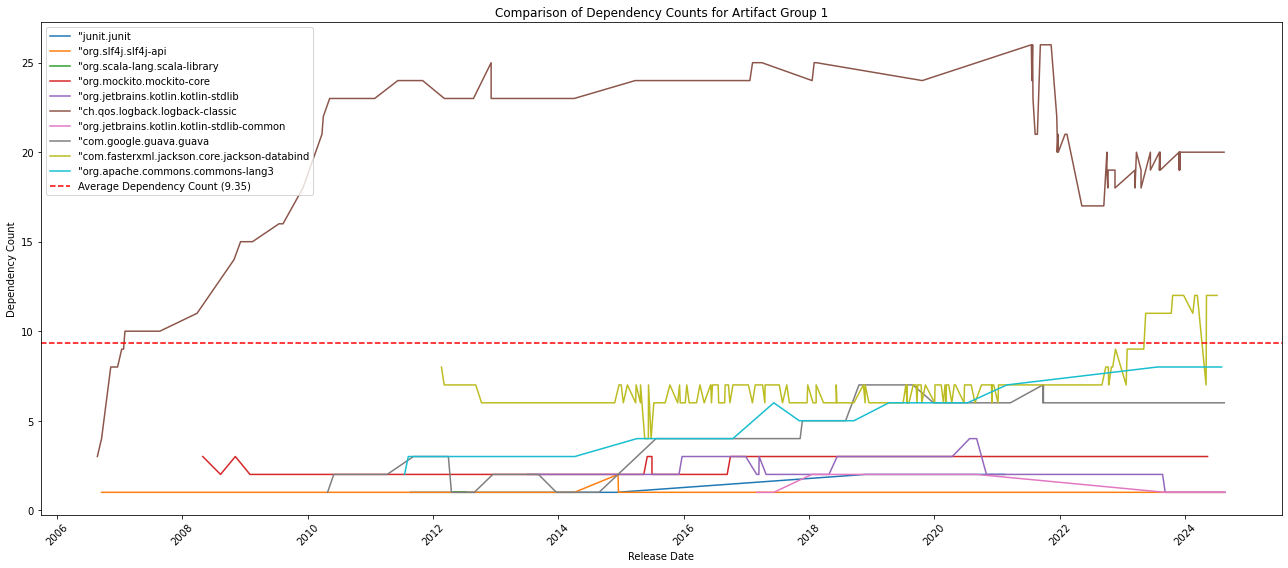

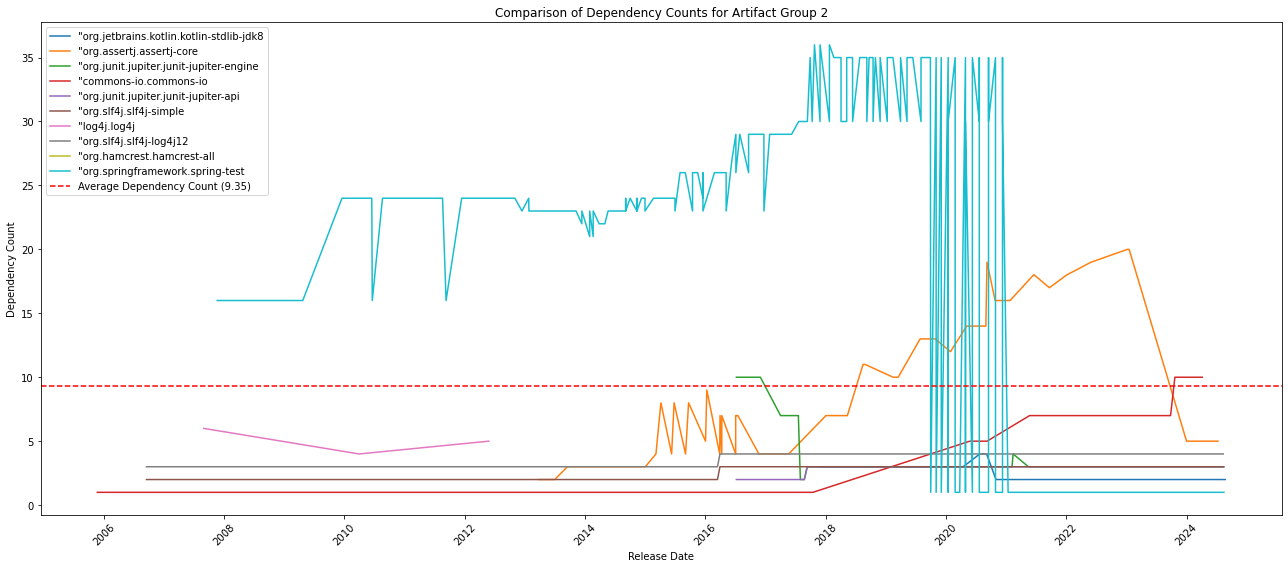

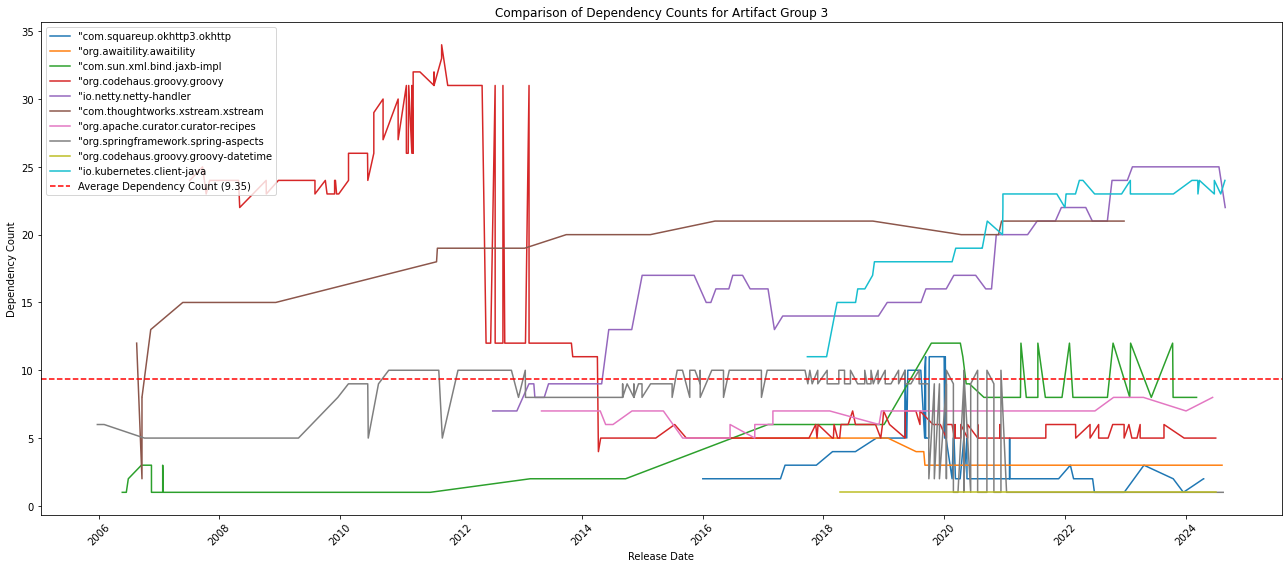

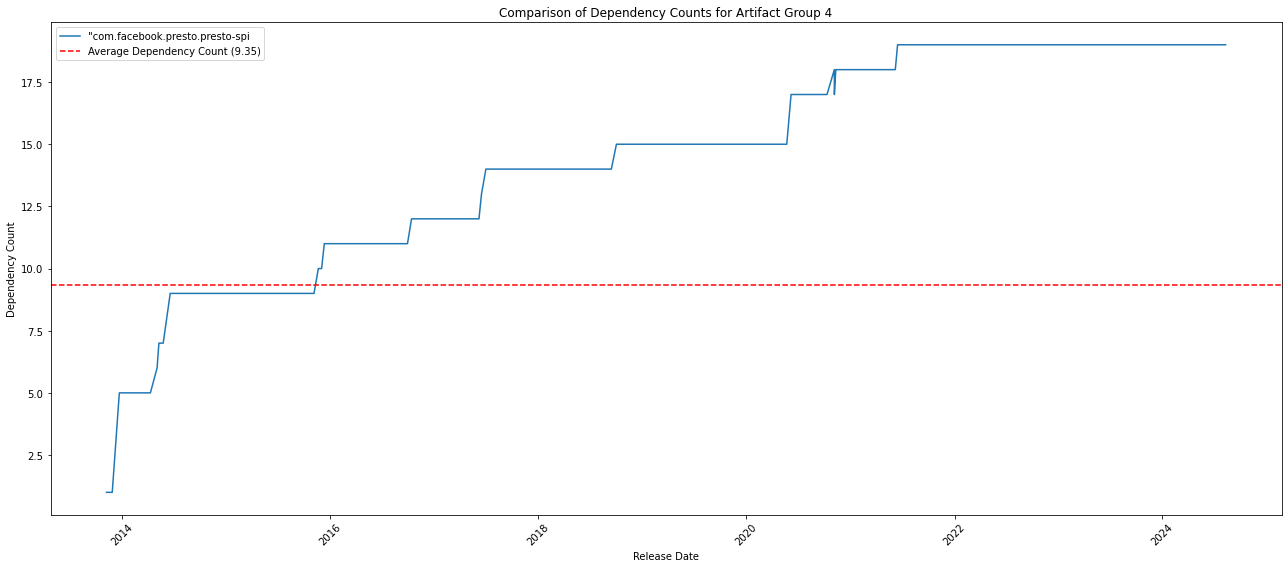

In [ ]:
folder_path = "../QueryExports/dependenciesDetails"
# Get all CSV files in the folder and split them into three groups
file_paths = sorted(glob.glob(os.path.join(folder_path, "*.csv")))
file_groups = [file_paths[i:i + 10] for i in range(0, len(file_paths), 10)]

# Average dependency count for reference
average_dependency_count = 9.35

# Plot each group in a separate figure
for group_index, group in enumerate(file_groups):
    plt.figure(figsize=(18, 8))
    for file_path in group:
        df = pd.read_csv(file_path)
        
        # Convert releaseDate to datetime after removing any extra quotes
        df['releaseDate'] = pd.to_datetime(df['releaseDate'].str.replace('"', ''), format="%Y-%m-%dT%H:%M:%SZ", errors='coerce')
        
        # Use the filename as the artifact ID (or use a specific column if available)
        artifact_id = '.'.join(df['releaseID'][0].split(":")[:-1])
        
        # Plot the data for this artifact
        plt.plot(df['releaseDate'], df['dependencyCount'], linestyle='-', label=artifact_id)

    # Add average dependency count line
    plt.axhline(y=average_dependency_count, color='r', linestyle='--', label=f'Average Dependency Count ({average_dependency_count})')

    # Customize the plot for this group
    plt.xlabel('Release Date')
    plt.ylabel('Dependency Count')
    plt.title(f'Comparison of Dependency Counts for Artifact Group {group_index + 1}')
    plt.legend(loc='upper left') 
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

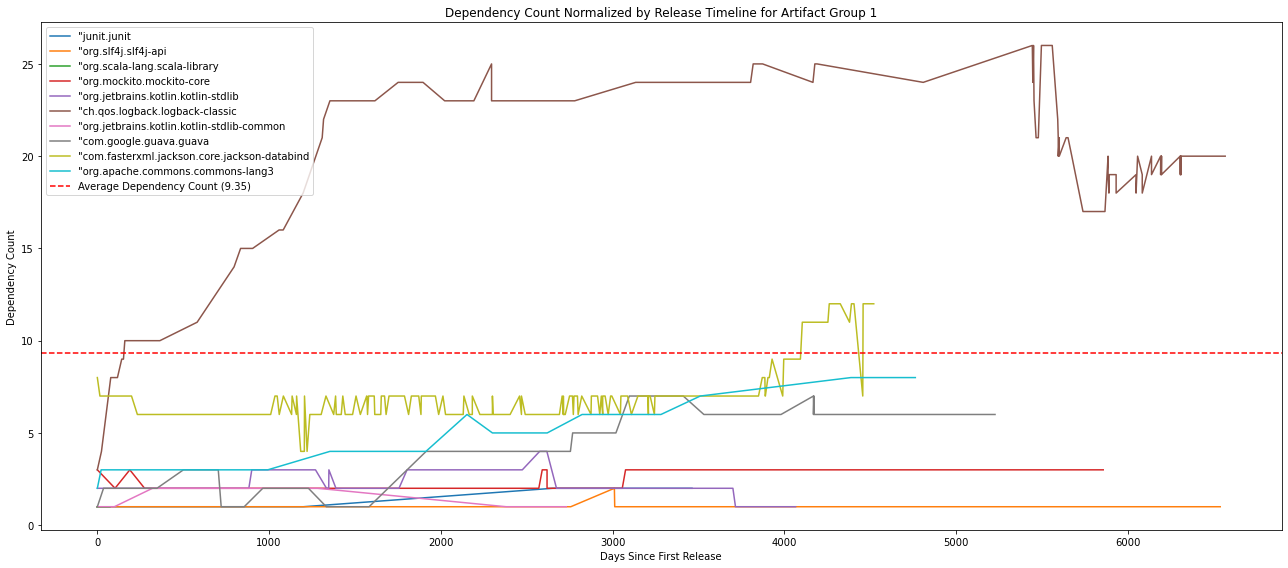

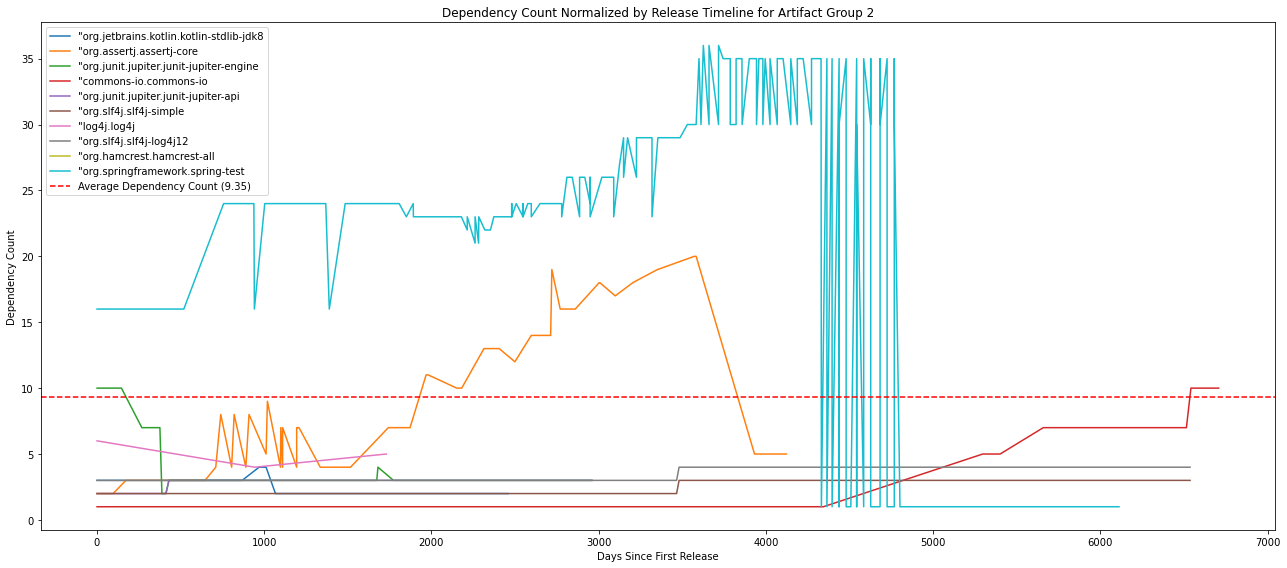

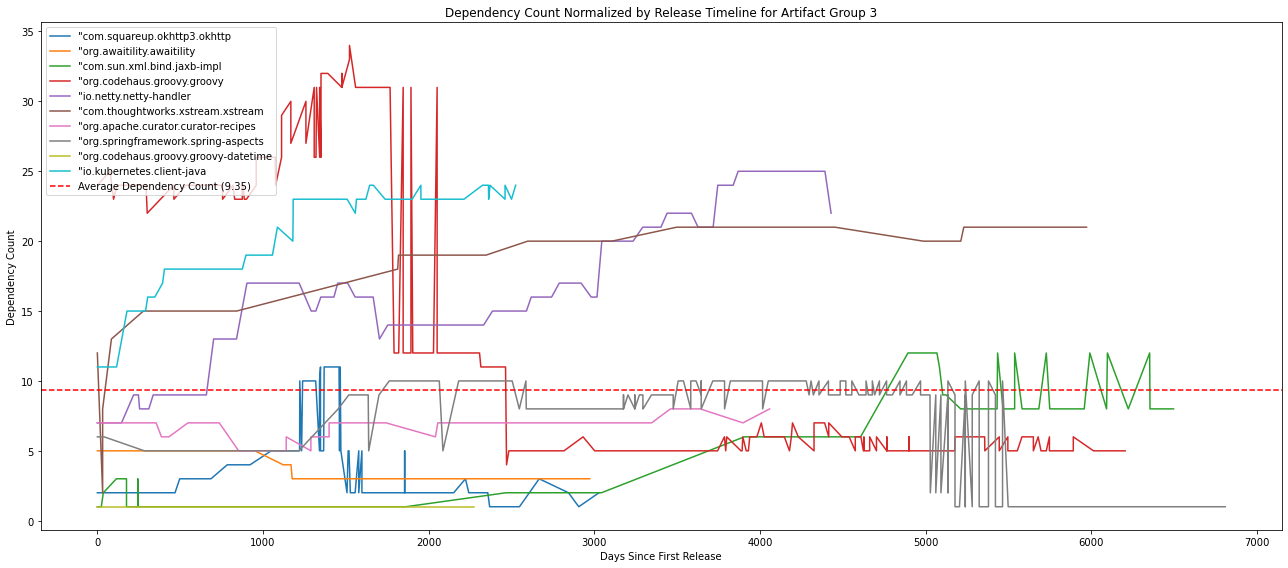

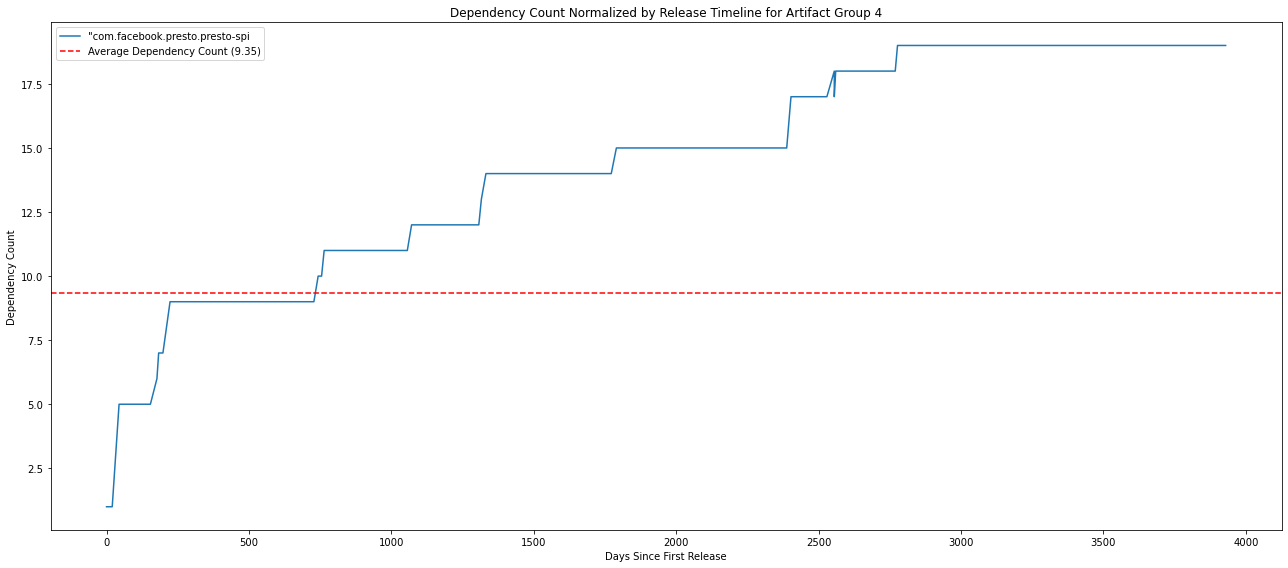

In [3]:
# Normalize Time to Track Release Progress

for group_index, group in enumerate(file_groups):
    plt.figure(figsize=(18, 8))
    for file_path in group:
        df = pd.read_csv(file_path)
        df['releaseDate'] = pd.to_datetime(df['releaseDate'].str.replace('"', ''), format="%Y-%m-%dT%H:%M:%SZ", errors='coerce')
        artifact_id = '.'.join(df['releaseID'][0].split(":")[:-1])

        # Normalize time by setting the first release date as Day 0
        df['daysSinceFirstRelease'] = (df['releaseDate'] - df['releaseDate'].min()).dt.days

        plt.plot(df['daysSinceFirstRelease'], df['dependencyCount'], linestyle='-', label=artifact_id)
        
        # Add average dependency count line
    plt.axhline(y=average_dependency_count, color='r', linestyle='--', label=f'Average Dependency Count ({average_dependency_count})')

    plt.xlabel('Days Since First Release')
    plt.ylabel('Dependency Count')
    plt.title(f'Dependency Count Normalized by Release Timeline for Artifact Group {group_index + 1}')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


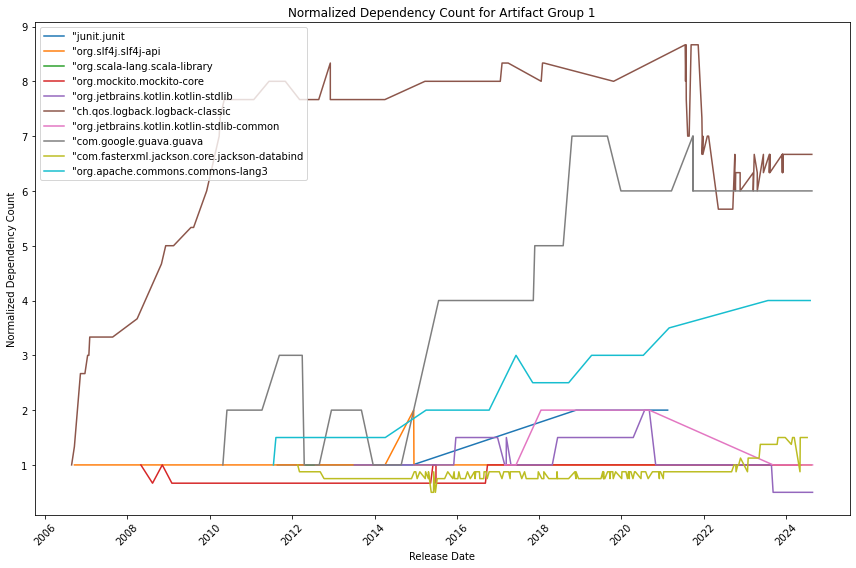

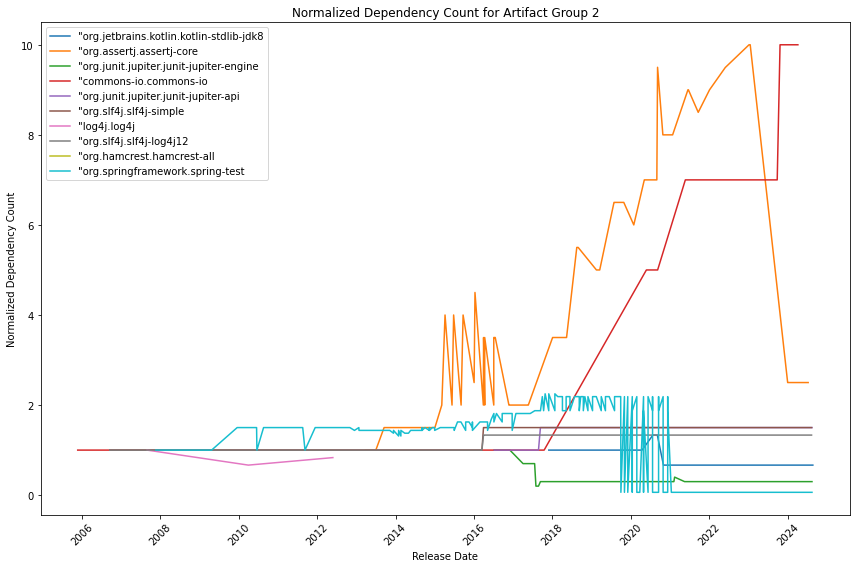

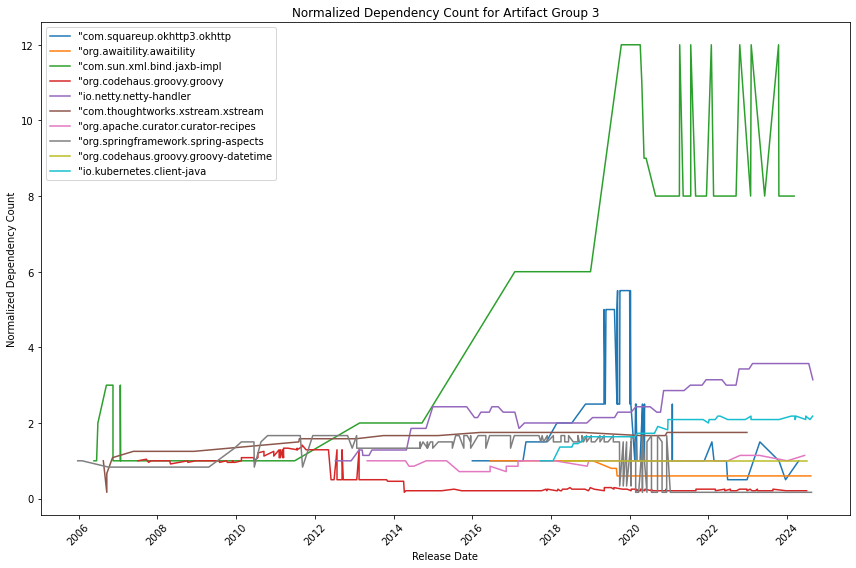

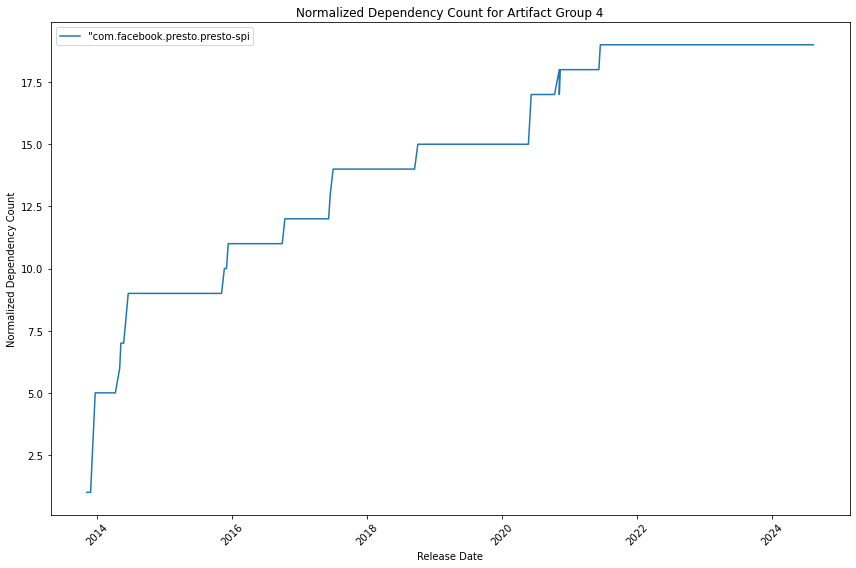

In [ ]:
# Normalize Dependency Count by initial count

for group_index, group in enumerate(file_groups):
    plt.figure(figsize=(12, 8))
    for file_path in group:
        df = pd.read_csv(file_path)
        df['releaseDate'] = pd.to_datetime(df['releaseDate'].str.replace('"', ''), format="%Y-%m-%dT%H:%M:%SZ", errors='coerce')
        artifact_id = '.'.join(df['releaseID'][0].split(":")[:-1])

        # Normalize dependency count by dividing by the initial dependency count for each artifact
        df['normalizedDependencyCount'] = df['dependencyCount'] / df['dependencyCount'][0]

        # Plot normalized values
        plt.plot(df['releaseDate'], df['normalizedDependencyCount'], linestyle='-', label=artifact_id)

    plt.xlabel('Release Date')
    plt.ylabel('Normalized Dependency Count')
    plt.title(f'Normalized Dependency Count for Artifact Group {group_index + 1}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


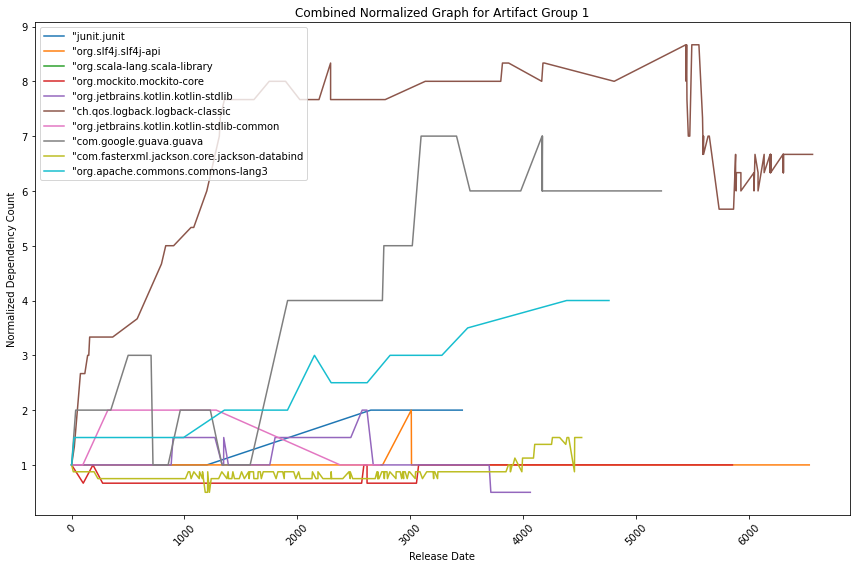

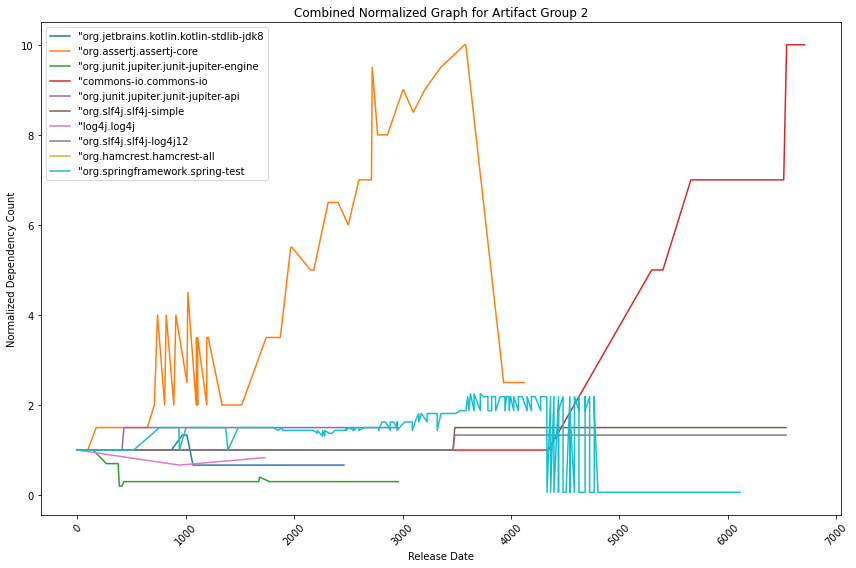

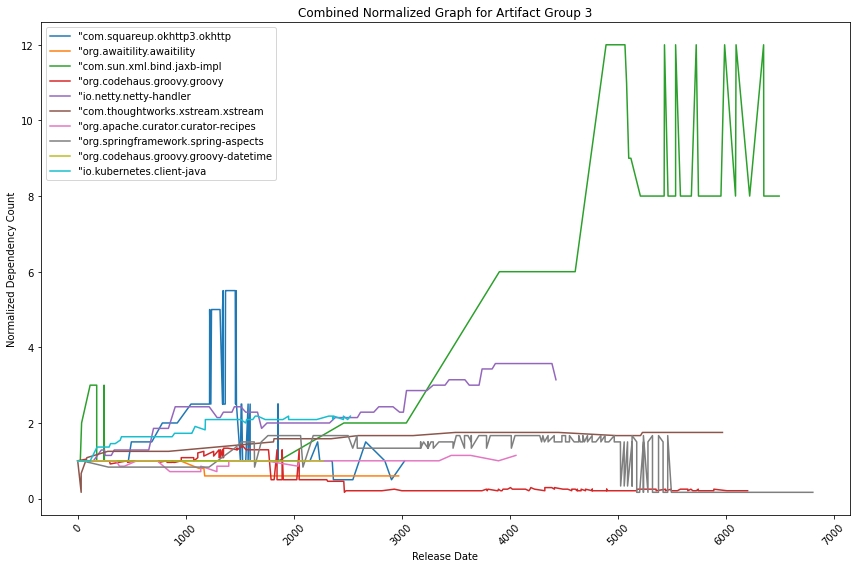

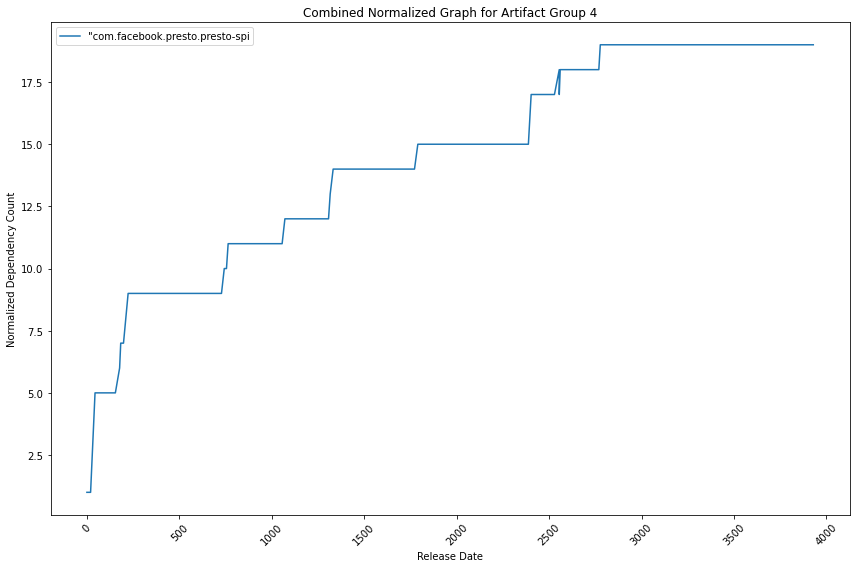

In [ ]:
# Normalize for both

for group_index, group in enumerate(file_groups):
    plt.figure(figsize=(12, 8))
    for file_path in group:
        df = pd.read_csv(file_path)
        df['releaseDate'] = pd.to_datetime(df['releaseDate'].str.replace('"', ''), format="%Y-%m-%dT%H:%M:%SZ", errors='coerce')
        artifact_id = '.'.join(df['releaseID'][0].split(":")[:-1])

        # Normalize dependency count by dividing by the initial dependency count for each artifact
        df['normalizedDependencyCount'] = df['dependencyCount'] / df['dependencyCount'][0]
        
        # Normalize time by setting the first release date as Day 0
        df['daysSinceFirstRelease'] = (df['releaseDate'] - df['releaseDate'].min()).dt.days
        
        # Plot normalized values
        plt.plot(df['daysSinceFirstRelease'], df['normalizedDependencyCount'], linestyle='-', label=artifact_id)

    plt.xlabel('Release Date')
    plt.ylabel('Normalized Dependency Count')
    plt.title(f'Combined Normalized Graph for Artifact Group {group_index + 1}')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

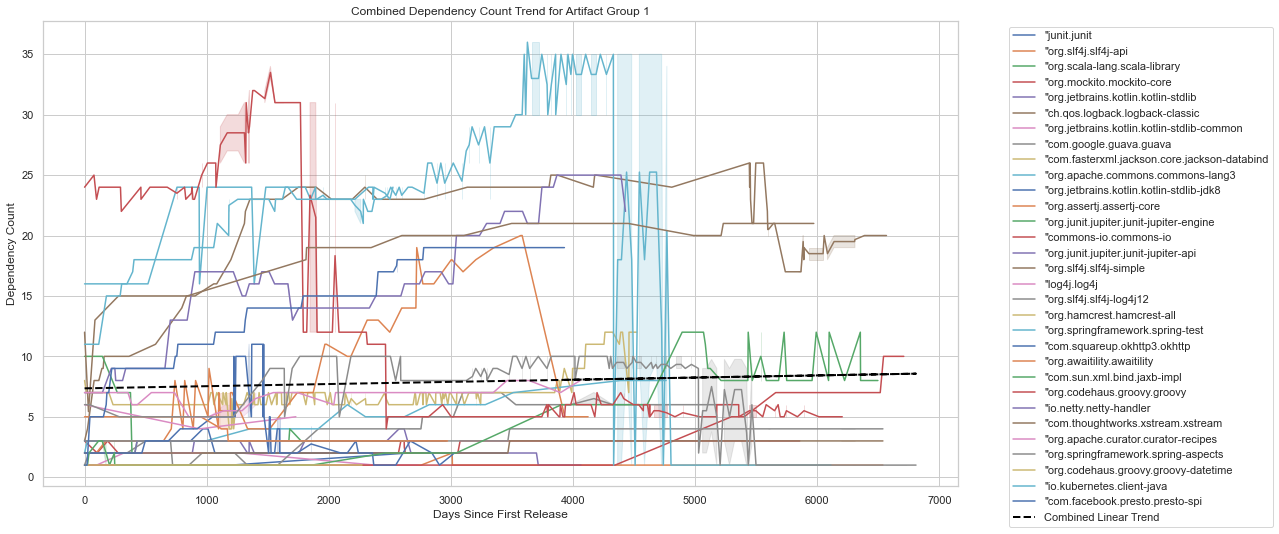

In [9]:
# Set Seaborn style
sns.set(style="whitegrid")

# Get all CSV files in the folder and split them into groups
file_paths = sorted(glob.glob(os.path.join(folder_path, "*.csv")))
file_groups = [file_paths[i:i + 31] for i in range(0, len(file_paths), 31)]

# Define logarithmic function for curve fitting (optional)
def log_func(x, a, b):
    return a * np.log(x + 1) + b

# Loop through each group to plot a combined trend line
for group_index, group in enumerate(file_groups):
    all_data = []
    plt.figure(figsize=(18, 8))

    # Combine data from all artifacts in the group
    for file_path in group:
        df = pd.read_csv(file_path)
        df['releaseDate'] = pd.to_datetime(df['releaseDate'].str.replace('"', ''), format="%Y-%m-%dT%H:%M:%SZ", errors='coerce')
        artifact_id = '.'.join(df['releaseID'][0].split(":")[:-1])

        # Normalize time by setting the first release date as Day 0
        df['daysSinceFirstRelease'] = (df['releaseDate'] - df['releaseDate'].min()).dt.days
        
        # Append relevant columns for combined trend analysis
        all_data.append(df[['daysSinceFirstRelease', 'dependencyCount']])

        # Plot individual artifact data
        sns.lineplot(x='daysSinceFirstRelease', y='dependencyCount', data=df, label=artifact_id)

    # Concatenate all data into one DataFrame for combined trend
    combined_df = pd.concat(all_data)

    # Fit a combined trend line (Choose one method below)
    # 1. Linear Regression
    X = combined_df['daysSinceFirstRelease'].values.reshape(-1, 1)
    y = combined_df['dependencyCount'].values
    lin_reg = LinearRegression().fit(X, y)
    trend = lin_reg.predict(X)
    plt.plot(combined_df['daysSinceFirstRelease'], trend, linestyle='--', color='black', label='Combined Linear Trend', linewidth=2)

    # Customize plot
    plt.xlabel('Days Since First Release')
    plt.ylabel('Dependency Count')
    plt.title(f'Combined Dependency Count Trend for Artifact Group {group_index + 1}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

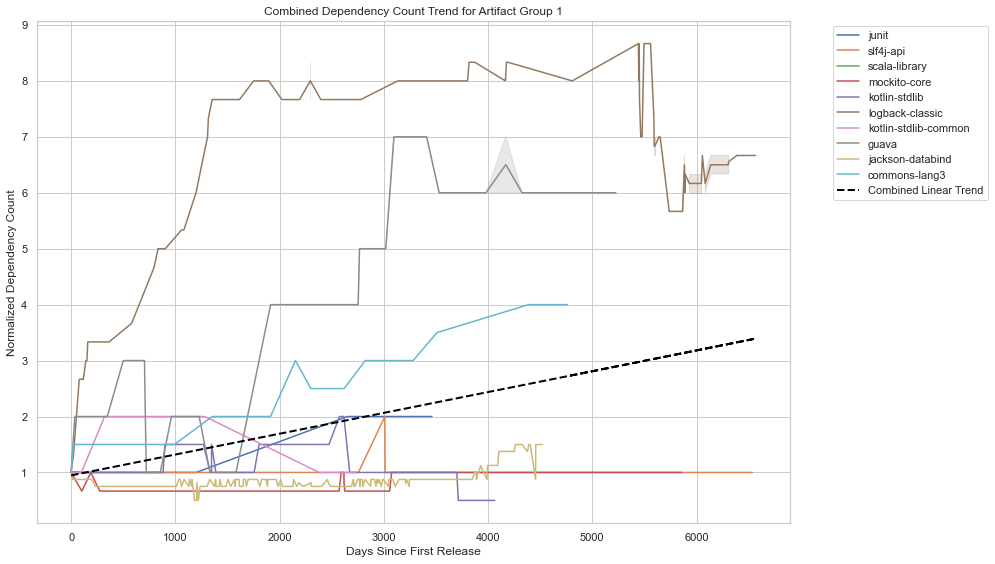

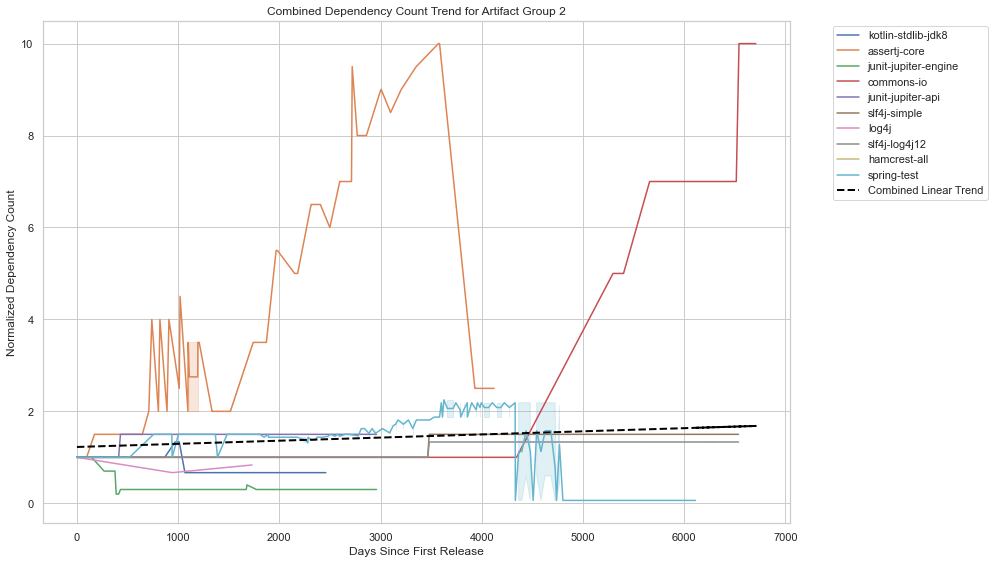

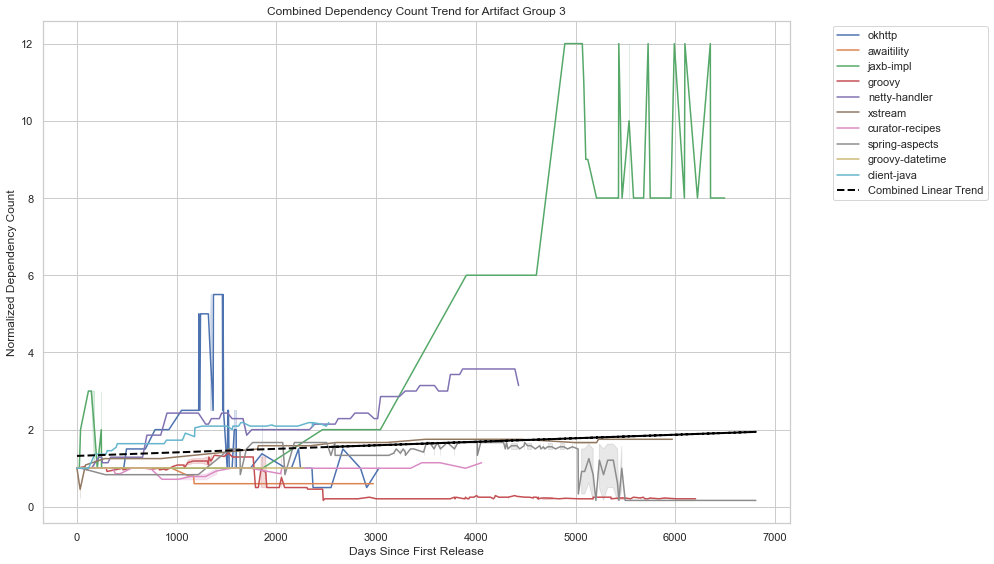

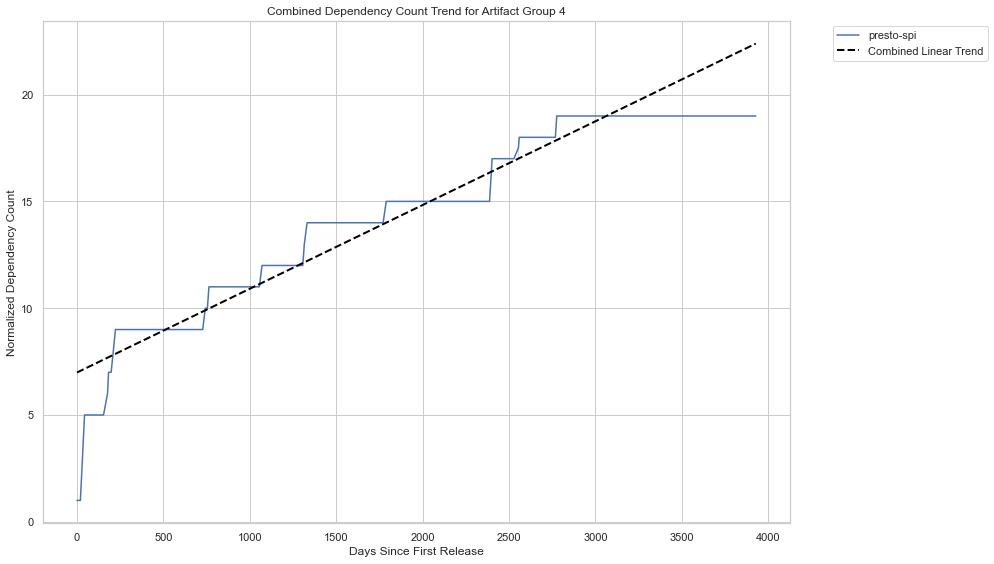

In [10]:
# Set Seaborn style
sns.set(style="whitegrid")

# Get all CSV files in the folder and split them into groups
file_paths = sorted(glob.glob(os.path.join(folder_path, "*.csv")))
file_groups = [file_paths[i:i + 10] for i in range(0, len(file_paths), 10)]

# Define logarithmic function for curve fitting (optional)
def log_func(x, a, b):
    return a * np.log(x + 1) + b

# Loop through each group to plot a combined trend line
for group_index, group in enumerate(file_groups):
    all_data = []
    plt.figure(figsize=(14, 8))

    # Combine data from all artifacts in the group
    for file_path in group:
        df = pd.read_csv(file_path)
        df['releaseDate'] = pd.to_datetime(df['releaseDate'].str.replace('"', ''), format="%Y-%m-%dT%H:%M:%SZ", errors='coerce')
        artifact_id = '.'.join(df['releaseID'][0].split(":")[1:-1])

        # Normalize time by setting the first release date as Day 0
        df['daysSinceFirstRelease'] = (df['releaseDate'] - df['releaseDate'].min()).dt.days
        df['normalizedDependencyCount'] = df['dependencyCount'] / df['dependencyCount'][0]
        
        # Append relevant columns for combined trend analysis
        all_data.append(df[['daysSinceFirstRelease', 'normalizedDependencyCount']])

        # Plot individual artifact data
        sns.lineplot(x='daysSinceFirstRelease', y='normalizedDependencyCount', data=df, label=artifact_id)

    # Concatenate all data into one DataFrame for combined trend
    combined_df = pd.concat(all_data)

    # Fit a combined trend line (Choose one method below)
    # 1. Linear Regression
    X = combined_df['daysSinceFirstRelease'].values.reshape(-1, 1)
    y = combined_df['normalizedDependencyCount'].values
    lin_reg = LinearRegression().fit(X, y)
    trend = lin_reg.predict(X)
    plt.plot(combined_df['daysSinceFirstRelease'], trend, linestyle='--', color='black', label='Combined Linear Trend', linewidth=2)

    # Customize plot
    plt.xlabel('Days Since First Release')
    plt.ylabel('Normalized Dependency Count')
    plt.title(f'Combined Dependency Count Trend for Artifact Group {group_index + 1}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()